In [177]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [98]:
df=pd.read_csv('train.csv', sep=',')

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.shape

(891, 12)

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
y=df.Survived

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=df.drop(['PassengerId','Cabin','Name','Ticket','Survived'], axis=1)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [108]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
mean_imputer=SimpleImputer(strategy='mean')

In [111]:
df['Age']=mean_imputer.fit_transform(df[['Age']])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [112]:
mf_imputer=SimpleImputer(strategy='most_frequent')

In [113]:
df['Embarked']=mf_imputer.fit_transform(df[['Embarked']])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [114]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [115]:
bins=np.arange(0,60,10)

In [117]:
df['AgeBucket']=pd.cut(df.Age, bins=bins)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket
0,3,male,22.000000,1,0,7.2500,S,"(20, 30]"
1,1,female,38.000000,1,0,71.2833,C,"(30, 40]"
2,3,female,26.000000,0,0,7.9250,S,"(20, 30]"
3,1,female,35.000000,1,0,53.1000,S,"(30, 40]"
4,3,male,35.000000,0,0,8.0500,S,"(30, 40]"
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,"(20, 30]"
887,1,female,19.000000,0,0,30.0000,S,"(10, 20]"
888,3,female,29.699118,1,2,23.4500,S,"(20, 30]"
889,1,male,26.000000,0,0,30.0000,C,"(20, 30]"


In [119]:
df=pd.get_dummies(df, columns=['Sex', 'Pclass','Embarked'])
df

,Age,SibSp,Parch,Fare,AgeBucket,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,"(20, 30]",0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,"(30, 40]",1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,"(20, 30]",1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,"(30, 40]",1,0,1,0,0,0,0,1
4,35.000000,0,0,8.0500,"(30, 40]",0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,"(20, 30]",0,1,0,1,0,0,0,1
887,19.000000,0,0,30.0000,"(10, 20]",1,0,1,0,0,0,0,1
888,29.699118,1,2,23.4500,"(20, 30]",1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,"(20, 30]",0,1,1,0,0,1,0,0


In [128]:
df=df.drop(['AgeBucket'], axis=1)
df

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
887,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
xtrain, xtest, ytrain, ytest=train_test_split(df, y, test_size=0.3)

In [131]:
xtrain

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
83,28.000000,0,0,47.1000,0,1,1,0,0,0,0,1
687,19.000000,0,0,10.1708,0,1,0,0,1,0,0,1
482,50.000000,0,0,8.0500,0,1,0,0,1,0,0,1
704,26.000000,1,0,7.8542,0,1,0,0,1,0,0,1
762,20.000000,0,0,7.2292,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,28.000000,2,0,7.9250,0,1,0,0,1,0,0,1
890,32.000000,0,0,7.7500,0,1,0,0,1,0,1,0
685,25.000000,1,2,41.5792,0,1,0,1,0,1,0,0
709,29.699118,1,1,15.2458,0,1,0,0,1,1,0,0


In [132]:
xtrain.shape

(623, 12)

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
model= DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [136]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [137]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [138]:
yhat=model.predict(xtest)
yhat

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [147]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [148]:
confusion_matrix(yhat,ytest)

array([[128,  40],
       [ 28,  72]], dtype=int64)

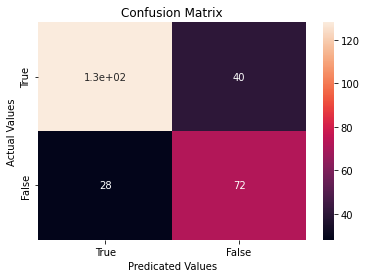

In [199]:
ax=sns.heatmap(confusion_matrix(yhat,ytest), annot=True)
ax.set(xlabel='Predicated Values', ylabel='Actual Values', title='Confusion Matrix')
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

In [152]:
from sklearn.metrics import classification_report

In [156]:
print(classification_report(yhat,ytest))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       168
           1       0.64      0.72      0.68       100

    accuracy                           0.75       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.75      0.75      0.75       268



In [157]:
from sklearn.tree import plot_tree

[Text(0.4345433462771203, 0.9782608695652174, 'X[5] <= 0.5\ngini = 0.466\nsamples = 623\nvalue = [393, 230]'),
 Text(0.19625246548323472, 0.9347826086956522, 'X[8] <= 0.5\ngini = 0.399\nsamples = 218\nvalue = [60, 158]'),
 Text(0.07692307692307693, 0.8913043478260869, 'X[0] <= 2.5\ngini = 0.097\nsamples = 117\nvalue = [6, 111]'),
 Text(0.06903353057199212, 0.8478260869565217, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08481262327416174, 0.8478260869565217, 'X[3] <= 26.125\ngini = 0.082\nsamples = 116\nvalue = [5, 111]'),
 Text(0.05917159763313609, 0.8043478260869565, 'X[1] <= 0.5\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.03155818540433925, 0.7608695652173914, 'X[3] <= 12.675\ngini = 0.124\nsamples = 30\nvalue = [2, 28]'),
 Text(0.023668639053254437, 0.717391304347826, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.03944773175542406, 0.717391304347826, 'X[3] <= 13.25\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.03155818540433925, 0.6739130434782609

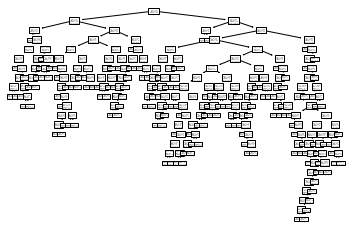

In [158]:
# plot_tree(model)

# Using Logistic Regression


In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr_model=LogisticRegression()
lr_model

LogisticRegression()

In [165]:
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [167]:
lr_model.coef_

array([[-3.89266251e-02, -3.31031932e-01, -6.25268079e-02,
        -1.01347214e-03,  1.66313130e+00, -1.01145010e+00,
         1.27101760e+00,  3.16550586e-01, -9.35886980e-01,
         4.23686825e-01,  3.50424745e-01, -1.22430367e-01]])

In [170]:
list(zip(xtest.columns,lr_model.coef_.flatten()))

[('Age', -0.03892662512673442),
 ('SibSp', -0.33103193222150434),
 ('Parch', -0.06252680789289511),
 ('Fare', -0.0010134721390684445),
 ('Sex_female', 1.6631313024917787),
 ('Sex_male', -1.0114500997980582),
 ('Pclass_1', 1.271017597025309),
 ('Pclass_2', 0.3165505855621974),
 ('Pclass_3', -0.9358869798940032),
 ('Embarked_C', 0.4236868254915016),
 ('Embarked_Q', 0.35042474455234585),
 ('Embarked_S', -0.12243036735015185)]

([<matplotlib.axis.XTick at 0x2913e36f220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

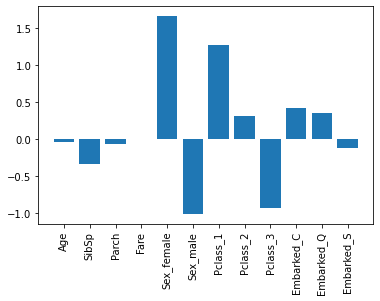

In [178]:
plt.bar(xtest.columns,lr_model.coef_.flatten())
plt.xticks(xtest.columns,rotation=90)

In [179]:
lr_model.intercept_

array([0.83514537])

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler= StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [187]:
y_hat=lr_model.predict(scaler.transform(xtest))
y_hat

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0], dtype=int64)

In [188]:
list(zip(y_hat,ytest))

[(1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 

In [189]:
confusion_matrix(y_hat, ytest)

array([[113,  20],
       [ 43,  92]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

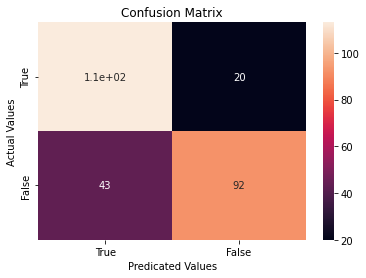

In [197]:
px=sns.heatmap(confusion_matrix(y_hat, ytest), annot=True)
px.set(xlabel='Predicated Values', ylabel='Actual Values', title='Confusion Matrix')
px.xaxis.set_ticklabels(['True','False'])
px.yaxis.set_ticklabels(['True','False'])
plt.show

In [201]:
print(classification_report(y_hat, ytest))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       133
           1       0.82      0.68      0.74       135

    accuracy                           0.76       268
   macro avg       0.77      0.77      0.76       268
weighted avg       0.77      0.76      0.76       268



In [202]:
y_prob=lr_model.predict_proba(scaler.transform(xtest))

In [203]:
y_prob1=y_prob[0:,1]

In [204]:
list(zip(ytest, y_prob1))

[(1, 0.959207792167536),
 (0, 0.04547835764839361),
 (0, 0.40464232342600537),
 (0, 0.3924016391992167),
 (1, 0.9997729902670908),
 (1, 0.9747995004474984),
 (1, 0.9794420645372107),
 (1, 0.817058880229649),
 (0, 0.8479797525124959),
 (0, 0.12454347786528662),
 (0, 0.4095832463457782),
 (1, 0.9442946540884468),
 (0, 0.8485093846786494),
 (1, 0.03528908786425883),
 (0, 0.9998350384991644),
 (0, 0.014198185056185263),
 (1, 0.9929984527066461),
 (0, 0.960125896005637),
 (0, 0.33047284276207073),
 (0, 0.19802476055069787),
 (0, 0.9299158952528808),
 (0, 0.020508438640275625),
 (0, 0.9853572282995665),
 (1, 0.9998476220072984),
 (0, 0.045343893769905746),
 (0, 0.9098525510338581),
 (1, 0.9992191686779116),
 (0, 0.15553134020998063),
 (0, 0.8410203978901992),
 (1, 0.9981927763748303),
 (0, 0.03192751207172584),
 (0, 0.045476832450766114),
 (1, 0.7140910921391215),
 (1, 0.9940036533371135),
 (1, 0.9561924765019033),
 (0, 0.8581660376426039),
 (0, 0.04538426186460661),
 (1, 0.9998304639156426)

In [206]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [207]:
tpr, fpr, t=roc_curve(ytest, y_prob1)

In [208]:
tpr, fpr, t

(array([0.        , 0.        , 0.        , 0.00641026, 0.00641026,
        0.01282051, 0.01282051, 0.01923077, 0.01923077, 0.02564103,
        0.02564103, 0.03205128, 0.03205128, 0.03205128, 0.03205128,
        0.03846154, 0.03846154, 0.05128205, 0.05128205, 0.07051282,
        0.07051282, 0.07692308, 0.07692308, 0.08333333, 0.08333333,
        0.10897436, 0.10897436, 0.13461538, 0.13461538, 0.14102564,
        0.14102564, 0.16025641, 0.16025641, 0.16025641, 0.16025641,
        0.16666667, 0.16666667, 0.17307692, 0.17307692, 0.17948718,
        0.17948718, 0.20512821, 0.20512821, 0.23717949, 0.23717949,
        0.24358974, 0.24358974, 0.25641026, 0.25641026, 0.26282051,
        0.26282051, 0.26923077, 0.26923077, 0.29487179, 0.30769231,
        0.32692308, 0.32692308, 0.33974359, 0.34615385, 0.37820513,
        0.37820513, 0.39102564, 0.39102564, 0.44871795, 0.48076923,
        0.50641026, 0.50641026, 0.51282051, 0.52564103, 0.56410256,
        0.56410256, 0.60897436, 0.62179487, 0.64

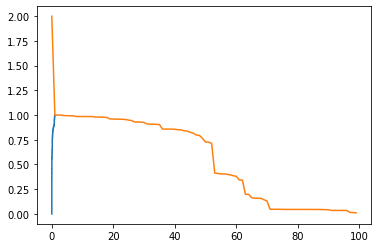

In [210]:
plt.plot(tpr, fpr, t)